In [2]:
import pandas as pd

# Read the documents
excel_df = pd.read_excel('merged_child_labor_analysis.xlsx')
csv_df = pd.read_csv('Clean_Goods_by_Company.csv')

# Extract company_name column
excel_companies = set(excel_df['company_name'].dropna().unique())
csv_companies = set(csv_df['company_name'].dropna().unique())

# Find common and unique company_name
common_companies = excel_companies.intersection(csv_companies)
unique_to_excel = excel_companies - csv_companies
unique_to_csv = csv_companies - excel_companies

# Output results
print("Common company_name:")
print(common_companies)

print("\nCompany_name in Excel but not in CSV:")
print(unique_to_excel)

print("\nCompany_name in CSV but not in Excel:")
print(unique_to_csv)


Common company_name:
{'ILLINOIS TOOL WORKS', 'Ralph Lauren Corporation', 'Melrose Industries PLC', 'Marks & Spencer Group Plc', 'CBRE Group Inc', 'SPECTRIS', 'COLGATE-PALMOLIVE', 'West Pharmaceutical Services Inc', 'The PMI Group Inc', 'Halma PLC', 'News Corp', 'TEXAS INSTRUMENTS', 'SERCO GROUP', 'Schroders PLC', 'Berkeley Group Holdings PLC ADR', 'Arista Networks', 'JM SMUCKER', 'Marshalls PLC', 'Omnicom Group Inc', 'Automatic Data Processing Inc', 'OXFORD INSTRUMENTS', 'Babcock International Group PLC', 'McKesson Corporation', 'FMC CORP', 'Marathon Petroleum Corp', 'Akamai Technologies Inc', 'Coca Cola HBC AG', 'GOLDMAN SACHS CDR', 'Sandvik AB', 'DuPont de Nemours Inc', 'Bunge Limited', 'Diploma PLC', 'Grafton Group PLC', 'ANGLO AMERICAN', 'CONOCOPHILLIPS', 'Eaton Corp PLC', 'Dover Corp', 'Micron Technology Inc', 'SERVICENOW', 'Balfour Beatty plc', 'ENTERGY', 'Royal Caribbean Group', 'BP PLC', 'Smith & Nephew plc', 'KIMBERLY-CLARK', 'ASTRAZENECA', '4Imprint Group Plc', 'DELTA AIR LIN

In [4]:
import pandas as pd

# Read Excel files
file1_df = pd.read_excel('child_labor_analysis_final_doc.xlsx')
file2_df = pd.read_excel('child_labor_analysis_result.xlsx')

# Find common columns
common_columns = file1_df.columns.intersection(file2_df.columns)

# Filter common columns
file1_common = file1_df[common_columns]
file2_common = file2_df[common_columns]

# Merge the two DataFrames
merged_df = pd.concat([file1_common, file2_common], ignore_index=True)

# Save the merged result to a new Excel file
merged_df.to_excel('merged_child_labor_analysis.xlsx', index=False)

print("Merge complete, results have been saved to 'merged_child_labor_analysis.xlsx'.")


Merge complete, results have been saved to 'merged_child_labor_analysis.xlsx'.


In [6]:
import pandas as pd

# Read the merged Excel file
merged_df = pd.read_excel('merged_child_labor_analysis.xlsx')

# Read the CSV file and extract the company_name column
csv_df = pd.read_csv('Clean_Goods_by_Company.csv')
csv_companies = set(csv_df['company_name'].dropna().unique())

# Filter merged_df to keep only the rows where company_name is in csv_companies
filtered_df = merged_df[merged_df['company_name'].isin(csv_companies)]

# Save the filtered results to a new Excel file
filtered_df.to_excel('filtered_merged_child_labor_analysis.xlsx', index=False)

print("Filtering complete, results have been saved to 'filtered_merged_child_labor_analysis.xlsx'.")


Filtering complete, results have been saved to 'filtered_merged_child_labor_analysis.xlsx'.


In [8]:
import re
from collections import defaultdict
import pandas as pd

# Read filtered_merged_child_labor_analysis.xlsx file
filtered_df = pd.read_excel('filtered_merged_child_labor_analysis.xlsx')

# Create a defaultdict to store countries and their corresponding total scores
country_scores = defaultdict(int)

# Iterate through the country_child_labor_flags column
for entry in filtered_df['country_child_labor_flags'].dropna():
    # Split each part and extract country and score
    parts = entry.split(',')

    for part in parts:
        # Use a regular expression to extract the country and score
        match = re.match(r"\s*'([^']+)'\s*:\s*(-?\d+)", part)
        if match:
            country = match.group(1)  # Extract country name
            score = int(match.group(2))  # Extract score and convert to integer

            # Accumulate the country's score
            country_scores[country] += score

# Output the total score for each country
print("Total scores for each country's child labor flags:")
for country, total_score in country_scores.items():
    print(f"{country}: {total_score}")


Total scores for each country's child labor flags:
China: -20
India: -21
Italy: -26
UK: -35
American Samoa: -2
Austria: -8
Belgium: -9
Colombia: -5
Dominican Republic: -5
Iceland: 0
Montenegro: -4
Sao Tome and Principe: 0
Tonga: -8
United States: -57
Andorra: -17
United Arab Emirates: -5
Anguilla: -2
Christmas Island: 0
Nicaragua: -1
Somalia: -1
Namibia: -2
South Africa: -10
Malawi: -1
Saudi Arabia: -6
Netherlands: -14
British: -7
Croatia: -16
Australia: -14
Bangladesh: -7
Canada: -19
United Kingdom: -31
Japan: -10
Cambodia: -4
Malaysia: -8
Pakistan: -9
Singapore: -9
Thailand: -12
Tuvalu: -3
Congo: -10
Holy See (Vatican City State): -1
Belarus: -7
Indonesia: -8
Solomon Islands: -6
New Caledonia: 0
Poland: -10
Armenia: -5
Argentina: -3
Bulgaria: -6
Brazil: -12
Switzerland: -10
Chile: -6
Costa Rica: -5
Germany: -15
Denmark: -4
Algeria: 0
Ecuador: -2
Egypt: -6
Spain: -15
Estonia: -4
Finland: -4
France: -15
Georgia: -2
Guatemala: -3
Hong Kong: -5
Hungary: -5
Israel: -6
Jordan: -3
Kazakhsta

In [10]:
import pandas as pd
import re
from collections import defaultdict

# Read the filtered_merged_child_labor_analysis.xlsx file
filtered_df = pd.read_excel('filtered_merged_child_labor_analysis.xlsx')

# Create a defaultdict to store countries and their corresponding total scores
country_scores = defaultdict(int)

# Iterate through the country_child_labor_flags column
for entry in filtered_df['country_child_labor_flags'].dropna():
    parts = entry.split(',')

    for part in parts:
        match = re.match(r"\s*'([^']+)'\s*:\s*(-?\d+)", part)
        if match:
            country = match.group(1)  # Extract country name
            score = int(match.group(2))  # Extract score and convert to integer
            country_scores[country] += score  # Accumulate the country's score

# Sort scores in descending order and create a DataFrame containing all countries
sorted_country_scores = dict(sorted(country_scores.items(), key=lambda item: item[1], reverse=True))
scores_df = pd.DataFrame(sorted_country_scores.items(), columns=['Country', 'Total Score'])

# Save the scores to a new Excel file
scores_df.to_excel('child_labor_flags_scores.xlsx', index=False)

# Filter out countries with a score of zero
filtered_country_scores = {country: score for country, score in sorted_country_scores.items() if score != 0}


In [12]:
import pandas as pd
import re
from collections import defaultdict

# Read the filtered_merged_child_labor_analysis.xlsx file
filtered_df = pd.read_excel('filtered_merged_child_labor_analysis.xlsx')

# Create a defaultdict to store countries and their corresponding total scores
country_scores = defaultdict(int)

# Create a mapping for country names to standardize them
country_mapping = {
    'UK': 'United Kingdom',
    'United Kingdom': 'United Kingdom',
    # You can add more mappings here if needed
}

# Iterate through the country_child_labor_flags column
for entry in filtered_df['country_child_labor_flags'].dropna():
    parts = entry.split(',')

    for part in parts:
        match = re.match(r"\s*'([^']+)'\s*:\s*(-?\d+)", part)
        if match:
            country = match.group(1)  # Extract country name
            # Standardize country name using the mapping if it exists
            country = country_mapping.get(country, country)
            score = int(match.group(2))  # Extract score and convert to integer
            country_scores[country] += score  # Accumulate the country's score

# Generate a dictionary for score categories
score_categories = defaultdict(list)
for country, score in country_scores.items():
    score_categories[score].append(country)

# Sort scores in descending order
sorted_scores = sorted(score_categories.items(), key=lambda item: item[0], reverse=True)

# Prepare data for DataFrame creation
data = []
for score, countries in sorted_scores:
    data.append({'Score': score, 'Countries': ', '.join(countries)})

# Create DataFrame
score_df = pd.DataFrame(data)

# Print a visual table
print("Score | Countries")
print("------|-----------")
for index, row in score_df.iterrows():
    print(f"{row['Score']:>5} | {row['Countries']}")


Score | Countries
------|-----------
    0 | Iceland, Sao Tome and Principe, Christmas Island, New Caledonia, Algeria, Tunisia, Cocos (Keeling) Islands, South Sudan, Pitcairn, Türkiye, Niger, United States Minor Outlying Islands, Western Sahara, Gambia, Saint Pierre and Miquelon, Burundi, Central African Republic, Guinea-Bissau, Comoros, Cameroon, Réunion, Guam, Montserrat, Grenada, Saint Vincent and the Grenadines, Liechtenstein, French Guiana, Suriname, Lesotho, Tajikistan, Timor-Leste, Antigua and Barbuda, Bermuda, Equatorial Guinea, Benin, Cuba, Marshall Islands, Mozambique, Sierra Leone, Aruba, Vanuatu, Martinique, British Indian Ocean Territory, Faroe Islands, Burkina Faso, Mayotte, Seychelles, Norfolk Island, Tokelau, Nauru, Chad, Gibraltar, San Marino, French Polynesia, Bouvet Island, Barbados, Palau, Kiribati, Guyana, Bahamas, Cook Islands, French Southern Territories, Mauritius, Eswatini, Fiji, Northern Mariana Islands, Dominica, Jamaica, Liberia, Togo, Mauritania, Bhutan, Gu

In [14]:
import pandas as pd

# Read the Excel file
file_path = 'child_labor_analysis_result.xlsx'
df = pd.read_excel(file_path)

# Extract rows with timestamps and relevant columns
df['Date'] = df['snippet'].str.extract(r'(\w{3} \d{1,2}, \d{4})')  # Extract timestamp
df = df.dropna(subset=['Date'])  # Remove rows without timestamps

# Convert the date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Sort by company name and date
df.sort_values(by=['company_name', 'Date'], inplace=True)

# Check the trend of scores over time for the same company
result = []
for company, group in df.groupby('company_name'):
    scores = group['child_labor_score_sum'].tolist()
    dates = group['Date'].tolist()
    
    trend = 'No data'  # Default trend
    if len(scores) > 1:
        if all(x < y for x, y in zip(scores, scores[1:])):
            trend = 'Increasing'
        elif all(x > y for x, y in zip(scores, scores[1:])):
            trend = 'Decreasing'
        else:
            trend = 'Uncertain'
        
    result.append((company, dates, scores, trend))

# Output the results
for company, dates, scores, trend in result:
    print(f"Company: {company}, Trend: {trend}, Dates: {dates}, Scores: {scores}")


Company: Coca Cola HBC AG, Trend: Uncertain, Dates: [Timestamp('2015-03-20 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2024-05-07 00:00:00')], Scores: [-48, -4, -12]
Company: Exxon Mobil Corp, Trend: Increasing, Dates: [Timestamp('2019-12-20 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2024-01-08 00:00:00'), Timestamp('2024-01-08 00:00:00')], Scores: [-29, -11, -3, 0]
Company: HP Inc, Trend: No data, Dates: [Timestamp('2017-06-15 00:00:00')], Scores: [0]
Company: International Paper, Trend: Uncertain, Dates: [Timestamp('2023-02-15 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-05-14 00:00:00')], Scores: [0, 0, -21]
Company: Marks & Spencer Group Plc, Trend: Decreasing, Dates: [Timestamp('2017-11-01 00:00:00'), Timestamp('2022-05-23 00:00:00')], Scores: [0, -19]
Company: McKesson Corporation, Trend: No data, Dates: [Timestamp('2019-10-08 00:00:00')], Scores: [-18]
Company: OXFORD INSTRUMENTS, Trend: Uncertain, Dates: [Timestamp('2019-06-11 00:00:0

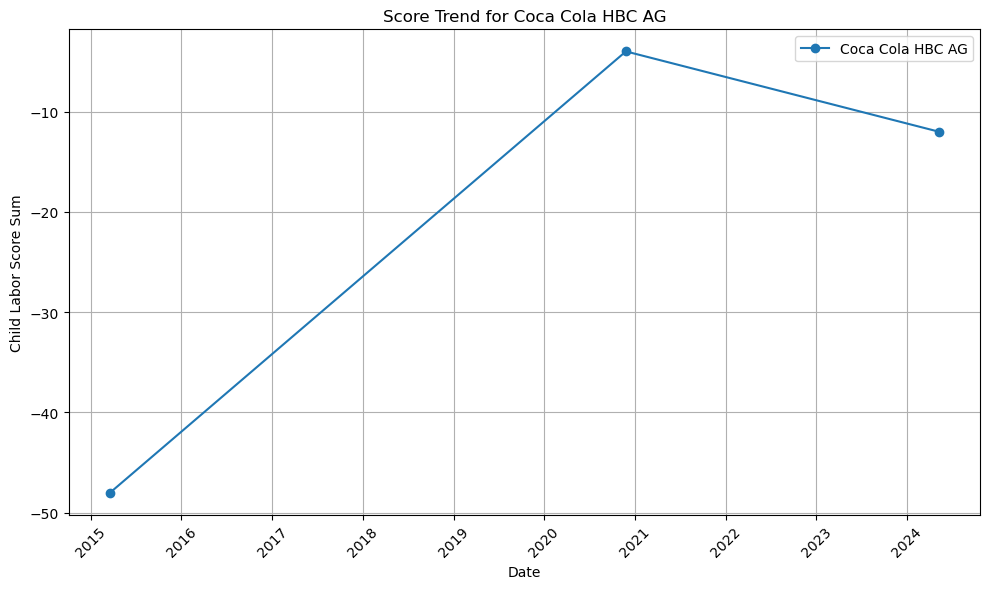

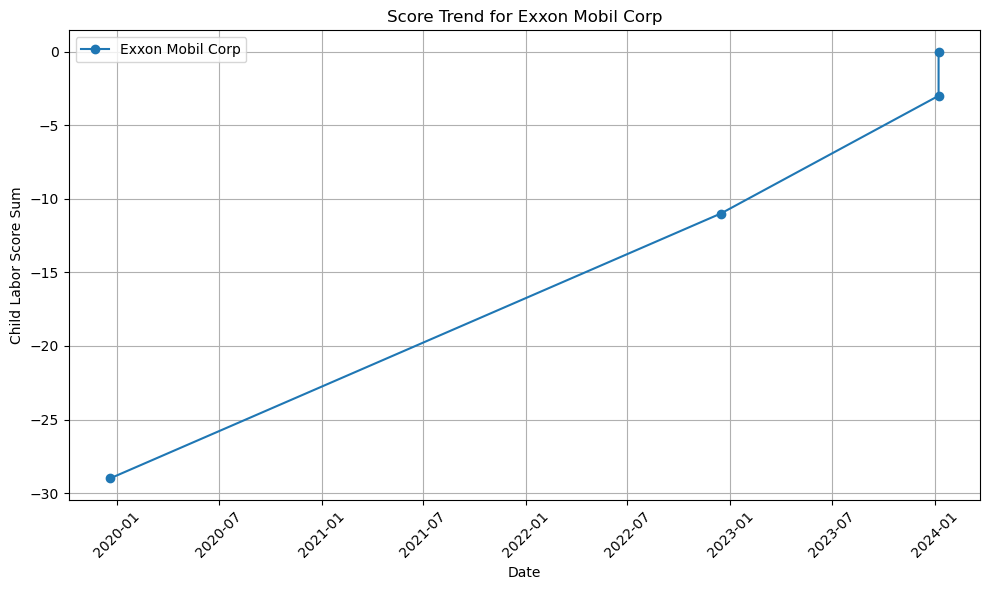

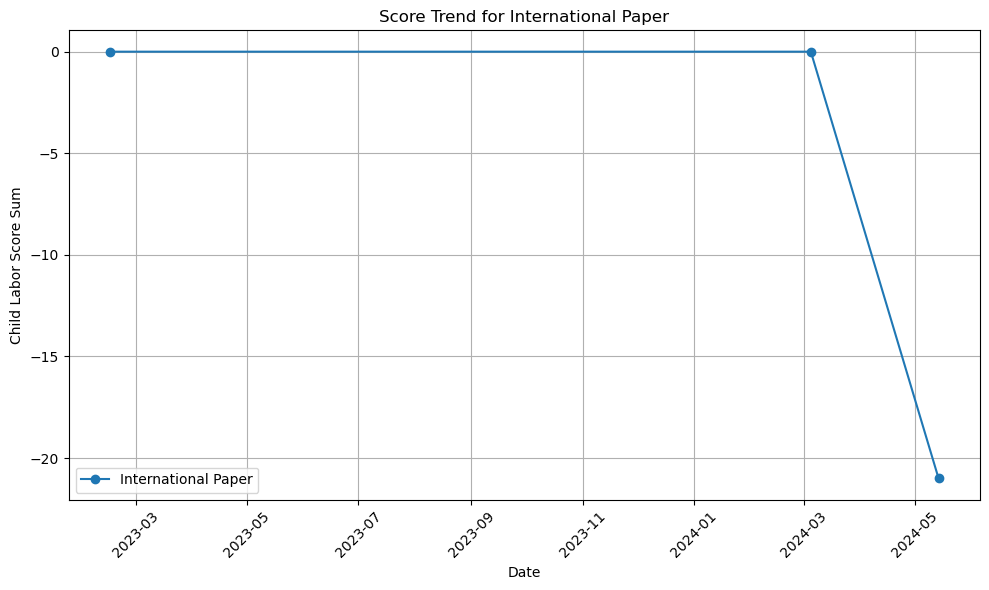

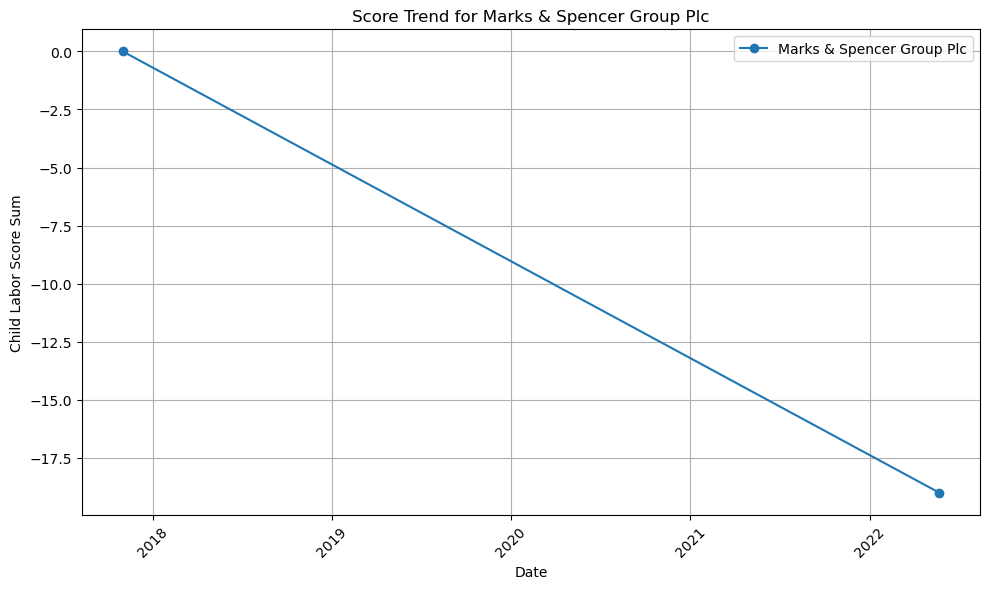

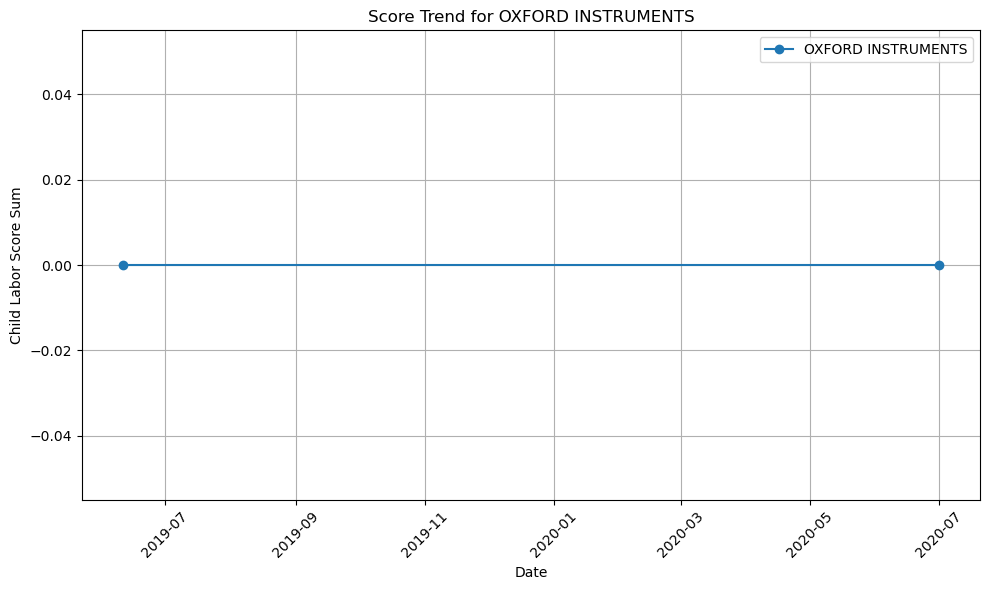

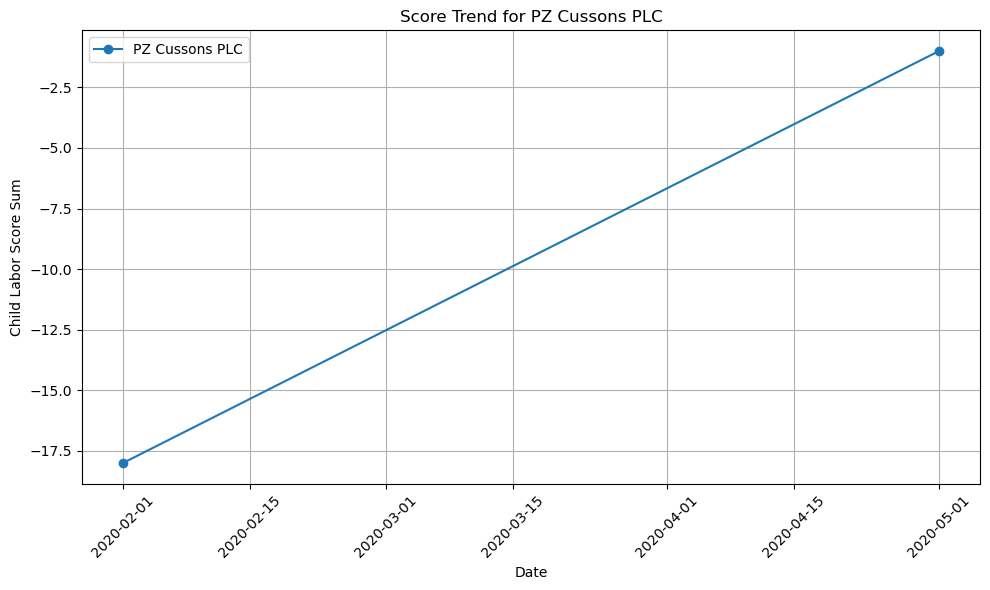

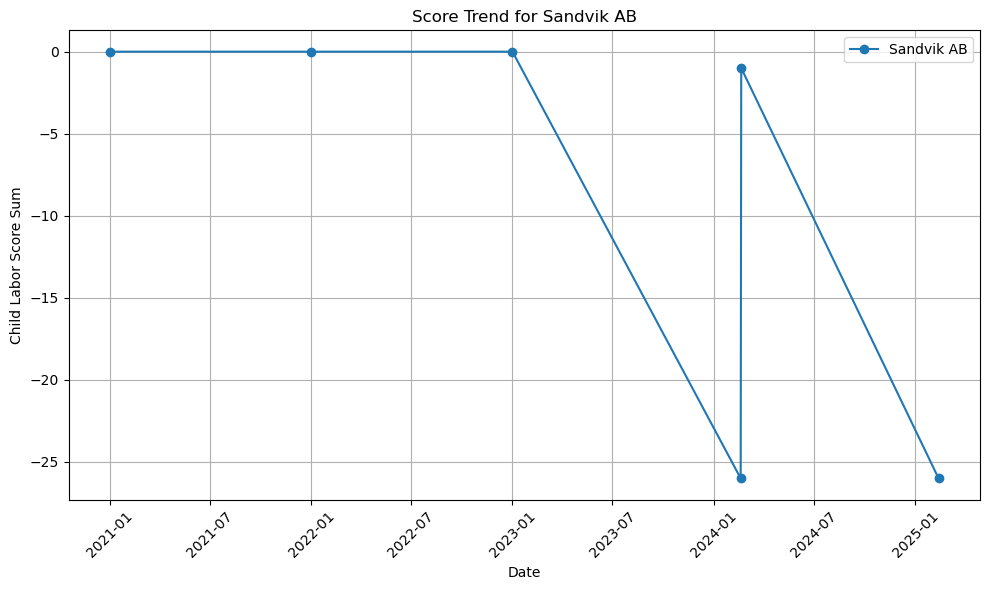

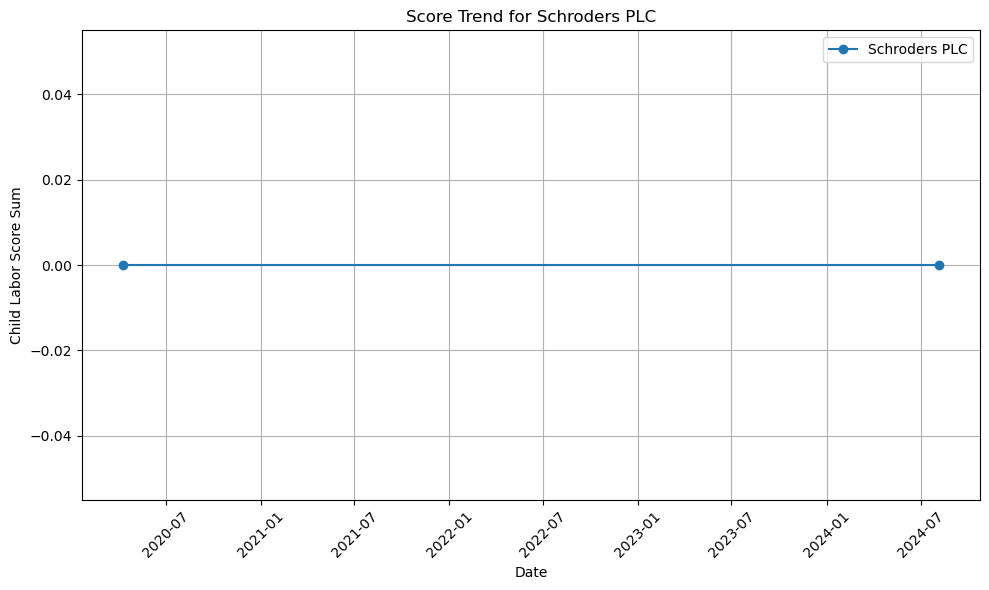

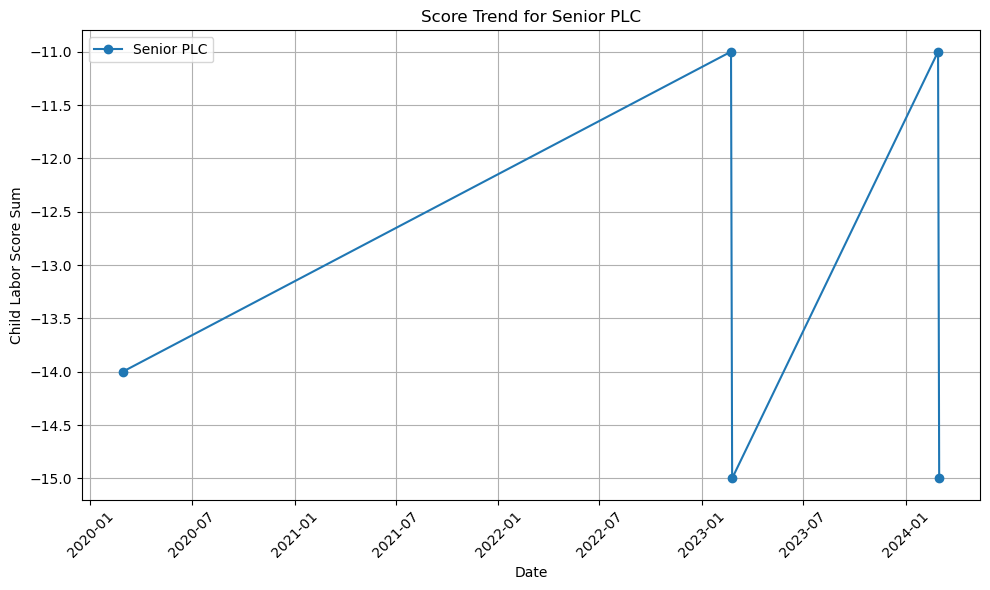

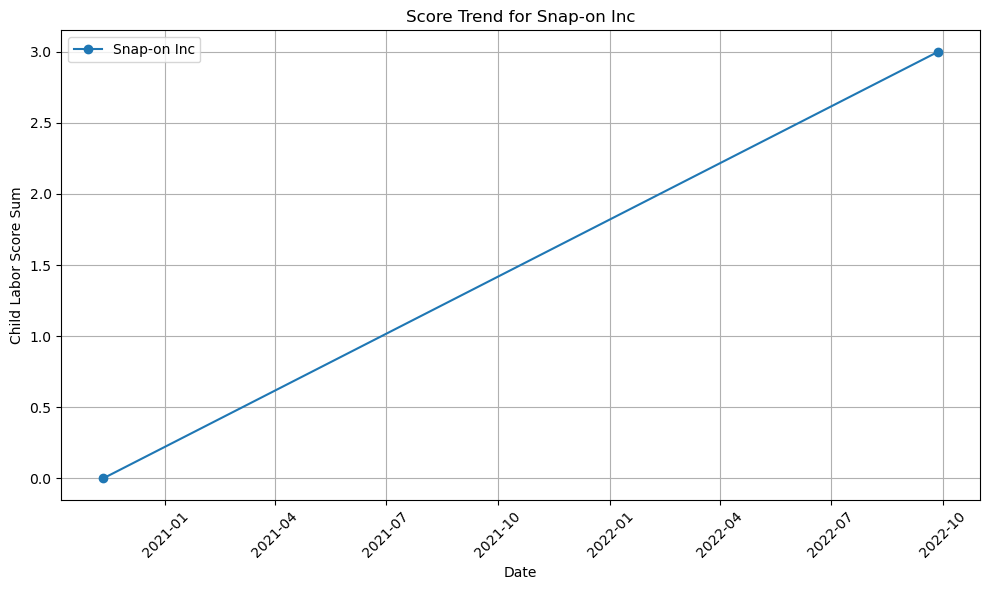

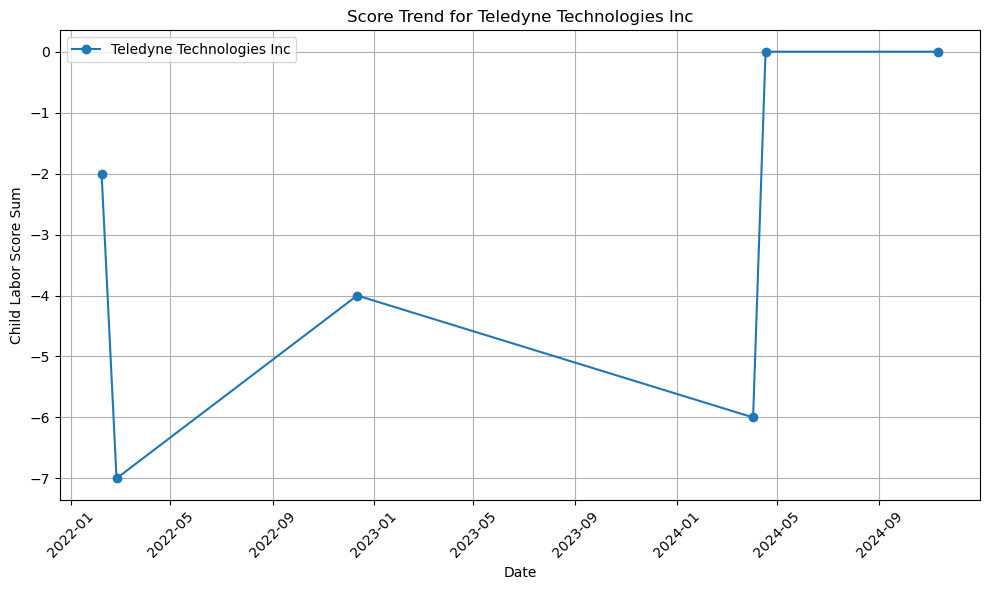

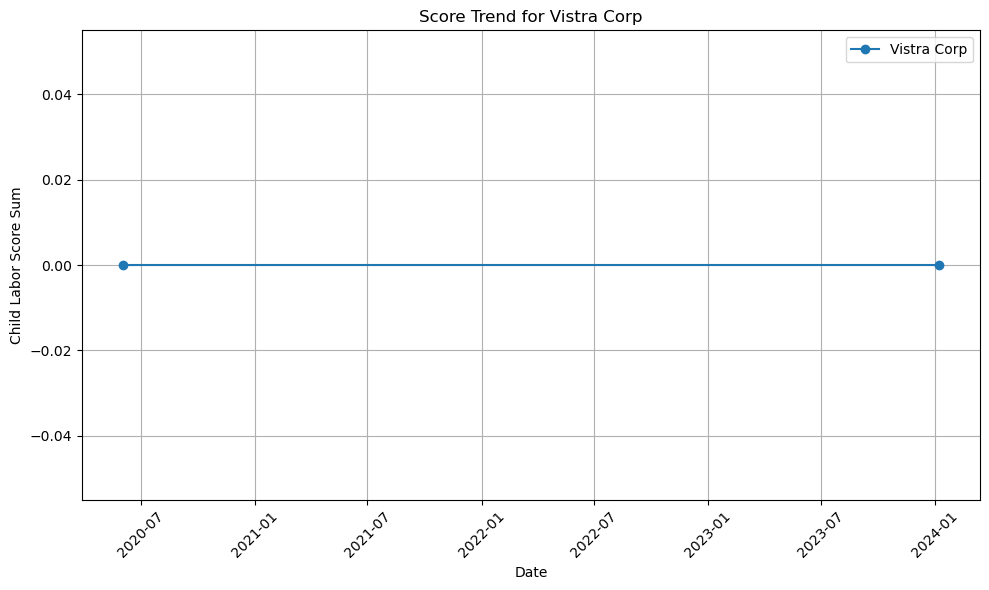

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'child_labor_analysis_result.xlsx'
df = pd.read_excel(file_path)

# Extract rows with timestamps and relevant columns
df['Date'] = df['snippet'].str.extract(r'(\w{3} \d{1,2}, \d{4})')  # Extract timestamp
df = df.dropna(subset=['Date'])  # Remove rows without timestamps

# Convert the date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Sort by company name and date
df.sort_values(by=['company_name', 'Date'], inplace=True)

# Check the score trends in chronological order for the same company
for company, group in df.groupby('company_name'):
    scores = group['child_labor_score_sum'].tolist()
    dates = group['Date'].tolist()
    
    # Only consider companies with more than 1 record
    if len(scores) > 1:
        plt.figure(figsize=(10, 6))
        plt.plot(dates, scores, marker='o', label=company)
        plt.title(f'Score Trend for {company}')
        plt.xlabel('Date')
        plt.ylabel('Child Labor Score Sum')
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{company}_score_trend.png')  # Save as image file
        plt.show()


Average child labor scores by different goods:
   goods_mentioned  child_labor_score_sum
0             coal               0.000000
1           cobalt               0.000000
2           coffee              -2.666667
3           cotton               0.000000
4      electronics             -15.000000
5          fabrics               0.000000
6        furniture              -8.000000
7         garments               0.000000
8              gas              -1.052632
9             gold              -1.700000
10        minerals              -2.100000
11             oil              -0.333333
12        palm oil              -1.000000
13           sugar              -5.333333
14        tantalum              -1.800000
15             tea              -3.205128
16          timber               0.000000
17             tin              -3.758065
18         tobacco               0.000000


C:\Users\华硕\AppData\Local\Temp\ipykernel_16664\557091338.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores, x='child_labor_score_sum', y='goods_mentioned', palette='viridis')


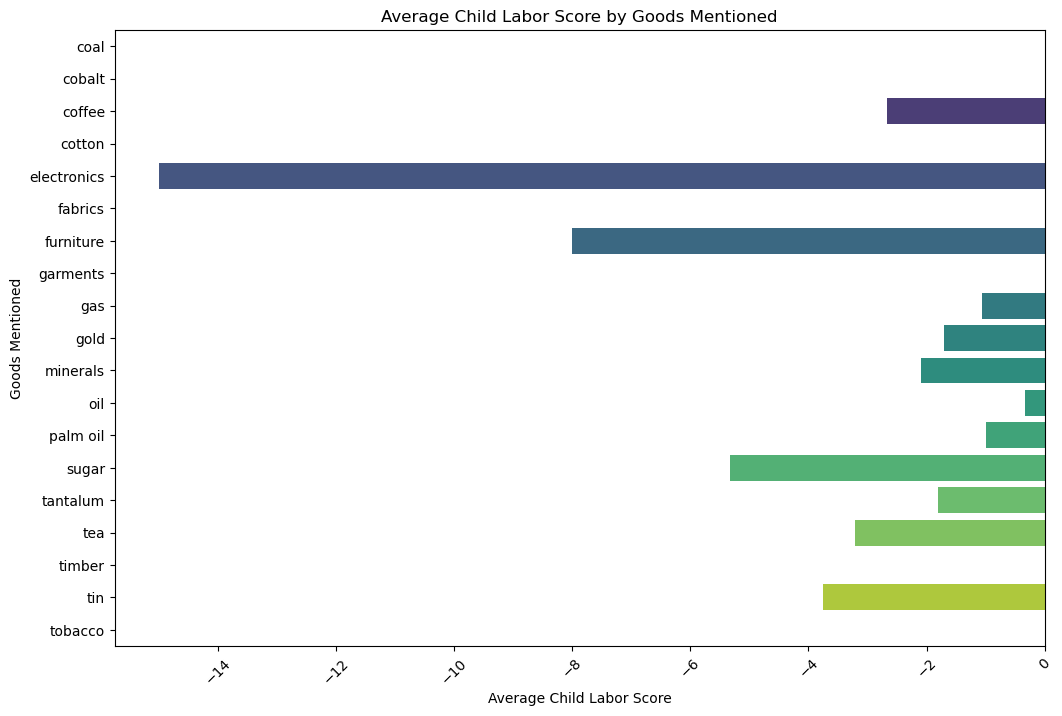

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data files
child_labor_df = pd.read_excel('merged_child_labor_analysis.xlsx')
goods_df = pd.read_csv('Clean_Goods_by_Company.csv')

# Remove extra whitespace
child_labor_df['company_name'] = child_labor_df['company_name'].str.strip()
goods_df['company_name'] = goods_df['company_name'].str.strip()

# Merge datasets
merged_df = pd.merge(child_labor_df, goods_df, on='company_name', how='inner')

# Create a new DataFrame to expand goods
goods_expanded = (
    merged_df[['company_name', 'child_labor_score_sum', 'goods_mentioned']]
    .copy()
)

# Split the goods_mentioned column
goods_expanded['goods_mentioned'] = goods_expanded['goods_mentioned'].str.split(';')
goods_expanded = goods_expanded.explode('goods_mentioned')

# Remove null values
goods_expanded['goods_mentioned'] = goods_expanded['goods_mentioned'].str.strip()
goods_expanded.dropna(subset=['goods_mentioned'], inplace=True)

# Calculate the average child labor score for each good
average_scores = goods_expanded.groupby('goods_mentioned')['child_labor_score_sum'].mean().reset_index()

# Output results
print("Average child labor scores by different goods:")
print(average_scores)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=average_scores, x='child_labor_score_sum', y='goods_mentioned', palette='viridis')
plt.title('Average Child Labor Score by Goods Mentioned')
plt.xlabel('Average Child Labor Score')
plt.ylabel('Goods Mentioned')
plt.xticks(rotation=45)
plt.show()


Average child labor scores by industry group:
           industry_group  child_labor_score_sum
2              Industrial              -2.166667
3  Information Technology              -3.523810
0          Consumer Goods              -5.833333
1             Health Care              -8.761905


C:\Users\华硕\AppData\Local\Temp\ipykernel_16664\1953942974.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores, x='child_labor_score_sum', y='industry_group', palette='viridis')


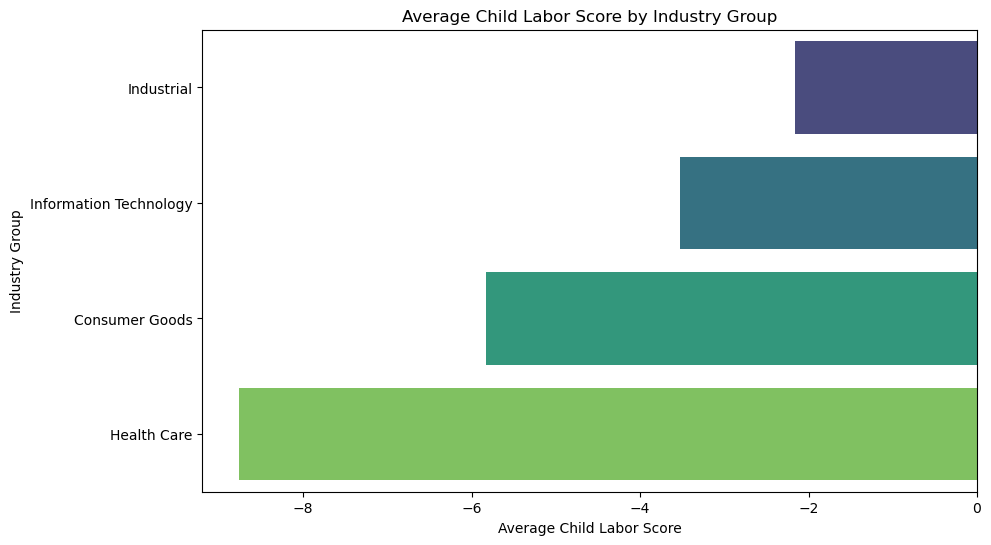

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data files
child_labor_df = pd.read_excel('merged_child_labor_analysis.xlsx')
goods_df = pd.read_csv('Clean_Goods_by_Company.csv')

# Data cleaning
child_labor_df['company_name'] = child_labor_df['company_name'].str.strip()
goods_df['company_name'] = goods_df['company_name'].str.strip()

# Merge datasets
merged_df = pd.merge(child_labor_df, goods_df, on='company_name', how='inner')

# Create a mapping table to map specific industries to broader categories
industry_mapping = {
    'Consumer Discretionary': 'Consumer Goods',
    'Consumer Staples': 'Consumer Goods',
    'Information Technology': 'Information Technology',
    'Health Care': 'Health Care',
    'Industrials': 'Industrial',
    'Energy;Real Estate': 'Industrial',
    # Add more mappings as needed based on actual data
}

# Create a new column based on the mapping
merged_df['industry_group'] = merged_df['sectors'].map(industry_mapping)

# Calculate the average child labor score for each industry group
average_scores = (
    merged_df.groupby('industry_group')['child_labor_score_sum']
    .mean()
    .reset_index()
)

# Sort the results
average_scores = average_scores.sort_values(by='child_labor_score_sum', ascending=False)

# Output results
print("Average child labor scores by industry group:")
print(average_scores)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_scores, x='child_labor_score_sum', y='industry_group', palette='viridis')
plt.title('Average Child Labor Score by Industry Group')
plt.xlabel('Average Child Labor Score')
plt.ylabel('Industry Group')
plt.show()


Weighted child labor risk scores by country:
                             Country  Weighted_Score
0                          Australia        -16.4927
1                             Canada        -14.0330
2   Democratic Republic of the Congo         -7.6097
3              Republic of the Congo         -0.7238
4                     United Kingdom        -29.4646
..                               ...             ...
56                             Egypt       -108.6442
57                            Greece       -108.6442
58                           Hungary       -108.6442
59                           Nigeria       -108.6442
60                            Serbia       -108.6442

[61 rows x 2 columns]


C:\Users\华硕\AppData\Local\Temp\ipykernel_16664\400233152.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_scores.head(len(sorted_scores)//2),  # First half


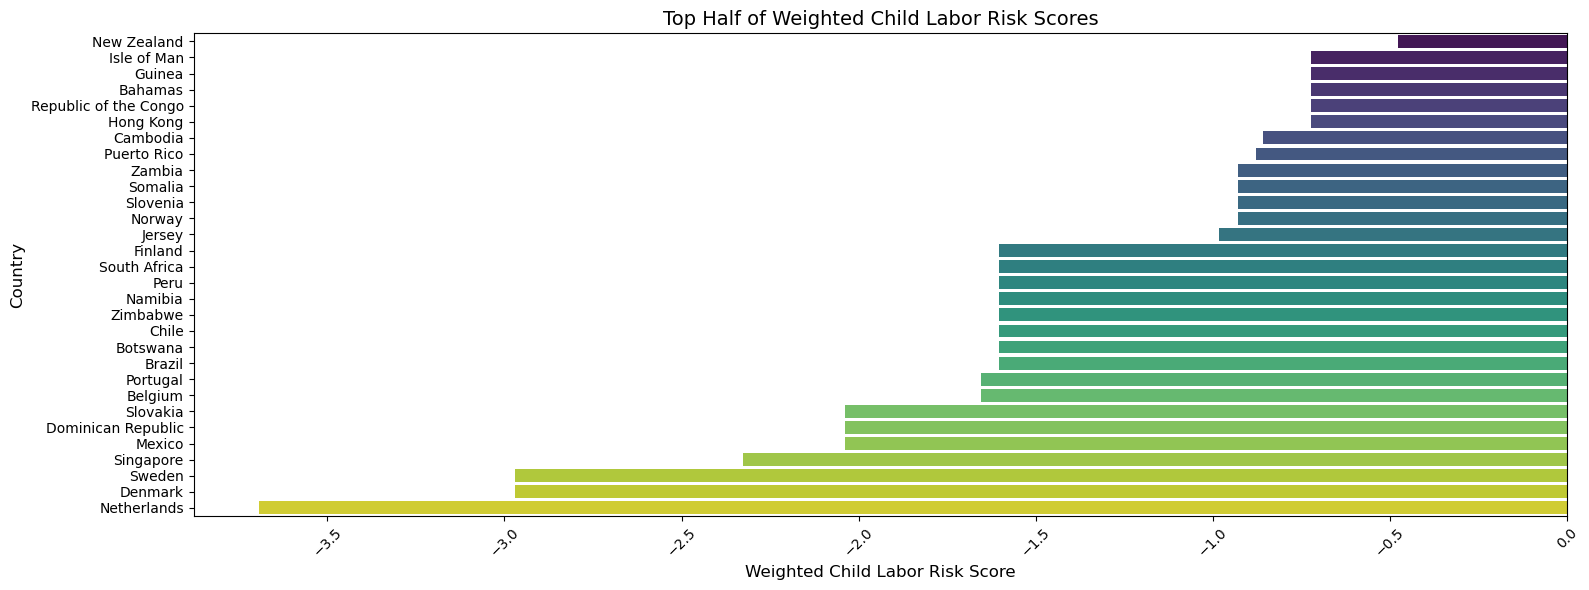

C:\Users\华硕\AppData\Local\Temp\ipykernel_16664\400233152.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_scores.tail(len(sorted_scores)//2),  # Second half


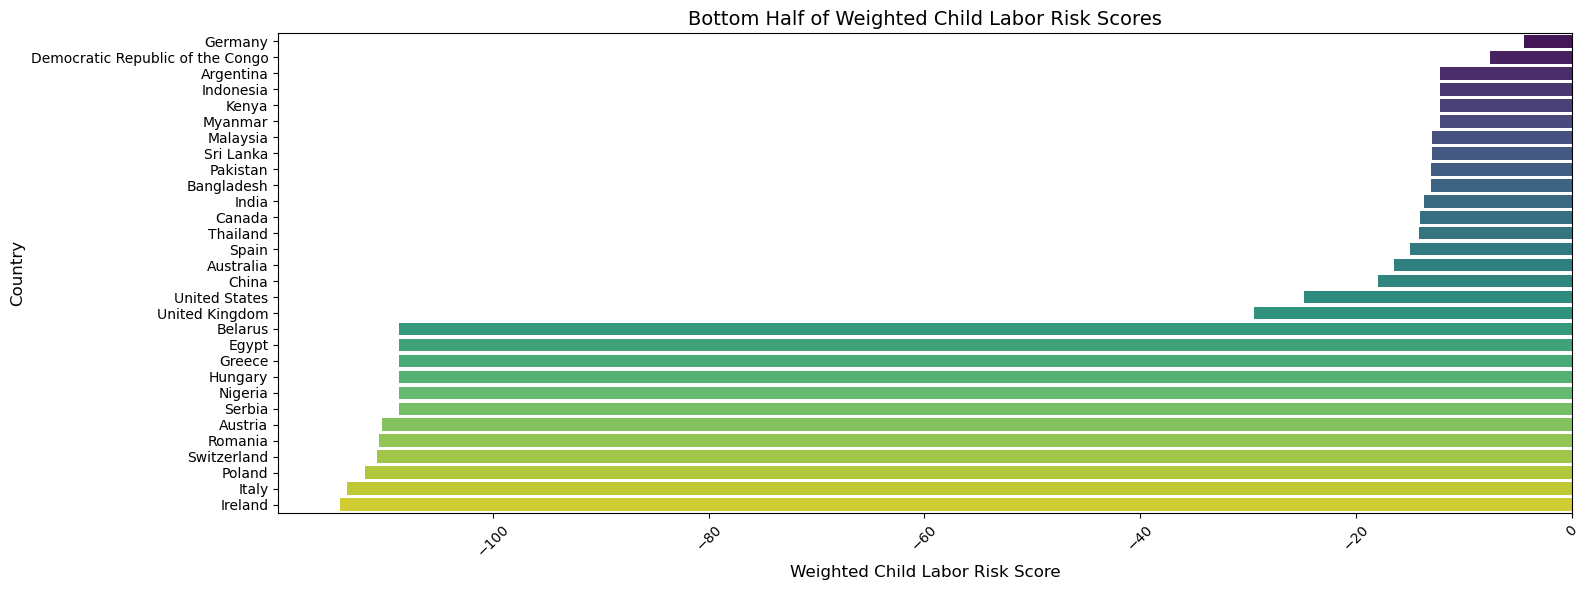

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data files
child_labor_df = pd.read_excel('merged_child_labor_analysis.xlsx')
goods_df = pd.read_csv('Clean_Goods_by_Company.csv')

# Data cleaning
child_labor_df['company_name'] = child_labor_df['company_name'].str.strip()
goods_df['company_name'] = goods_df['company_name'].str.strip()

# Merge datasets
merged_df = pd.merge(child_labor_df, goods_df, on='company_name', how='inner')

# Define weights
role_weight = {
    'manufacturing_country': 0.1073,  # Weight for manufacturing country
    'sourced_from_country': 0.0517,    # Weight for sourcing country
    'importer_country': 0.7651,         # Weight for importer country
    'exporter_country': 0.0759          # Weight for exporter country
}

# Prepare an empty dictionary to save the weighted risk scores for each country
country_weighted_scores = {}

# Iterate through the DataFrame to accumulate the weighted risk scores for each country
for index, row in merged_df.iterrows():
    # Only process records where the score is not zero
    if row['child_labor_score_sum'] != 0:
        for role, weight in role_weight.items():
            country_list = row[role]
            if isinstance(country_list, str):
                # Split the country string by semicolon
                countries = [country.strip() for country in country_list.split(';')]
                for country in countries:
                    if country not in country_weighted_scores:
                        country_weighted_scores[country] = 0
                    # Accumulate the weighted child labor score
                    country_weighted_scores[country] += row['child_labor_score_sum'] * weight

# Convert the results to a DataFrame
weighted_scores_df = pd.DataFrame(list(country_weighted_scores.items()), columns=['Country', 'Weighted_Score'])

# Output the results
print("Weighted child labor risk scores by country:")
print(weighted_scores_df)

# Create the plot for the top half of the scores
plt.figure(figsize=(16, 6))

# Sort the data by score
sorted_scores = weighted_scores_df.sort_values(by='Weighted_Score', ascending=False)

# Plot the top half
sns.barplot(data=sorted_scores.head(len(sorted_scores)//2),  # First half
            x='Weighted_Score', y='Country', palette='viridis')
plt.title('Top Half of Weighted Child Labor Risk Scores', fontsize=14)
plt.xlabel('Weighted Child Labor Risk Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create another plot for the bottom half of the scores
plt.figure(figsize=(16, 6))

# Plot the bottom half
sns.barplot(data=sorted_scores.tail(len(sorted_scores)//2),  # Second half
            x='Weighted_Score', y='Country', palette='viridis')
plt.title('Bottom Half of Weighted Child Labor Risk Scores', fontsize=14)
plt.xlabel('Weighted Child Labor Risk Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
